In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import LSTM, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report

In [2]:
data , labels = np.load(r'C:\SEM-5\Bio\final\balanced_data.npy'), np.load('one_hot_encoded_labels.npy')

In [3]:
trainx, testx, trainy, testy = train_test_split(data, labels, train_size = 0.9, shuffle = True)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Model

# Define the input shape
sequence_length = 13
num_features = 61440

input_layer = Input(shape=(sequence_length, num_features))

# CNN Branch
cnn_out = Conv1D(filters=32, kernel_size=2, activation='relu')(input_layer)
cnn_out = Conv1D(filters=32, kernel_size=2, activation='relu')(cnn_out)
cnn_out = MaxPooling1D(pool_size=2)(cnn_out)
cnn_out = Conv1D(filters=64, kernel_size=2, activation='relu')(cnn_out)
cnn_out = Conv1D(filters=32, kernel_size=2, activation='relu')(cnn_out)
cnn_out = MaxPooling1D(pool_size=2)(cnn_out)


# LSTM Branch
lstm_out = LSTM(units=64, return_sequences=True)(cnn_out)
lstm_out = LSTM(units=64)(lstm_out)

# Fully Connected Layers
dense_out = Dense(64, activation='relu')(lstm_out)
dense_out = Dense(128, activation='relu')(dense_out)

# Output Layer for binary classification
output_layer = Dense(units=2, activation='softmax')(dense_out)

# Define the model
model2 = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model2.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 13, 61440)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 12, 32)         │     3,932,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 11, 32)         │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 5, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 4, 64)          │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 3, 32)          │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 64)          │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,013,154 (15.31 MB)

 Trainable params: 4,013,154 (15.31 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
his = model2.fit(data, labels, epochs=20)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.5528 - loss: 0.6779
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7196 - loss: 0.6138
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7125 - loss: 0.5695
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7173 - loss: 0.5619
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.6933 - loss: 0.6063
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7063 - loss: 0.5799
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.6831 - loss: 0.6228
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7009 - loss: 0.5779
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7224 - loss: 0.5629
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7087 - loss: 0.5771
Epoch 11/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.6798 - loss: 0.5890
Epoch 12/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy:

In [10]:
import matplotlib.pyplot as plt

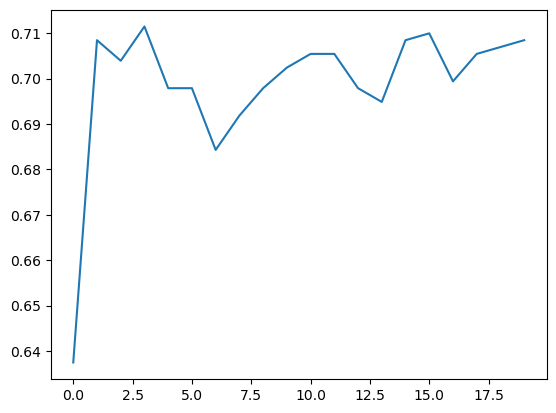

In [11]:
plt.plot(his.history['accuracy'])

In [12]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [13]:
preds = model2.predict(testx)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


In [14]:
predictions = [np.argsort(i)[-1] for i in preds]
truth_values = [np.argsort(i)[-1] for i in testy]

In [15]:
print(classification_report(predictions, truth_values))

              precision    recall  f1-score   support

           0       0.44      1.00      0.62        12
           1       1.00      0.73      0.84        55

    accuracy                           0.78        67
   macro avg       0.72      0.86      0.73        67
weighted avg       0.90      0.78      0.80        67



In [ ]:
#model.save('70model.keras')

In [ ]:
#model.save('80model.keras')

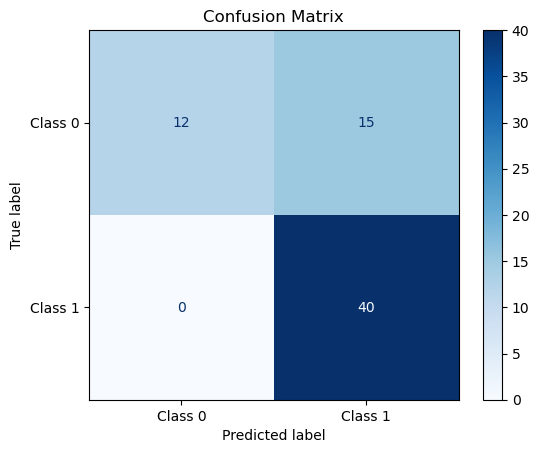

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example: True labels and predicted labels
true_labels = truth_values
predicted_labels = predictions

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class names (if applicable)
class_names = ['Class 0', 'Class 1']

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)

# Customize plot (optional)
plt.title('Confusion Matrix')
plt.show()
